In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# https://help.sap.com/viewer/0eec0d68141541d1b07893a39944924e/2.0.02/en-US/f3b8fabf34324302b123297cdbe710f0.html

from hdbcli import dbapi

conn = dbapi.connect(
    address="hxe",
    port=39017,
    user="SYSTEM",
    password="HXEHana1"
)

cursor = conn.cursor()

cursor.execute("SELECT * FROM M_TABLES")

tabledata = cursor.fetchall()

In [11]:
tables=pd.DataFrame(tabledata)
# https://stackoverflow.com/questions/7831371/is-there-a-way-to-get-a-list-of-column-names-in-sqlite
tables.columns=list(map(lambda x: x[0], cursor.description))
tables.head()

,SCHEMA_NAME,TABLE_NAME,RECORD_COUNT,TABLE_SIZE,IS_COLUMN_TABLE,TABLE_TYPE,IS_PARTITIONED,IS_REPLICATED,HAS_RECORD_COMMIT_TIMESTAMP
0,SYS,RS_TABLES_,888,427472,FALSE,ROW,FALSE,FALSE,FALSE
1,SYS,RS_COLUMNS_,17786,6087624,FALSE,ROW,FALSE,FALSE,FALSE
2,SYS,P_INDEXES_,648,154176,FALSE,ROW,FALSE,FALSE,FALSE
3,SYS,RS_VIEWS_,830,1296560,FALSE,ROW,FALSE,FALSE,FALSE
4,SYS,P_PROCEDURES_,823,1993896,FALSE,ROW,FALSE,FALSE,FALSE


In [12]:
tables.describe()

,RECORD_COUNT,TABLE_SIZE
count,1176.000000,1.176000e+03
mean,329.029762,5.519680e+04
std,2798.774401,3.386117e+05
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,1.771100e+04
max,48702.000000,6.087624e+06


Text(0.5, 0, 'Table Name')

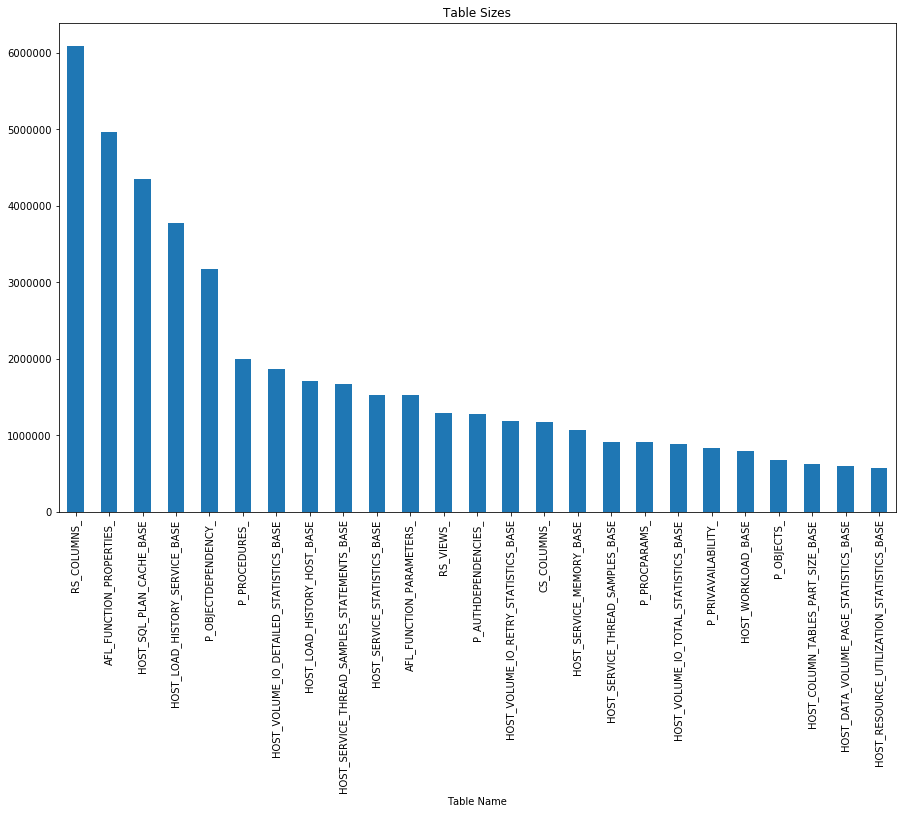

In [13]:
measure = 'TABLE_SIZE'
tables.groupby(['TABLE_NAME']) \
    .sum() \
    .sort_values(by=measure,ascending=False) \
    .nlargest(25,measure)[measure] \
    .plot(kind='bar',legend=None,title="Table Sizes",figsize=(15,9)) \
    .set_xlabel('Table Name')

Text(0.5, 0, 'Table Name')

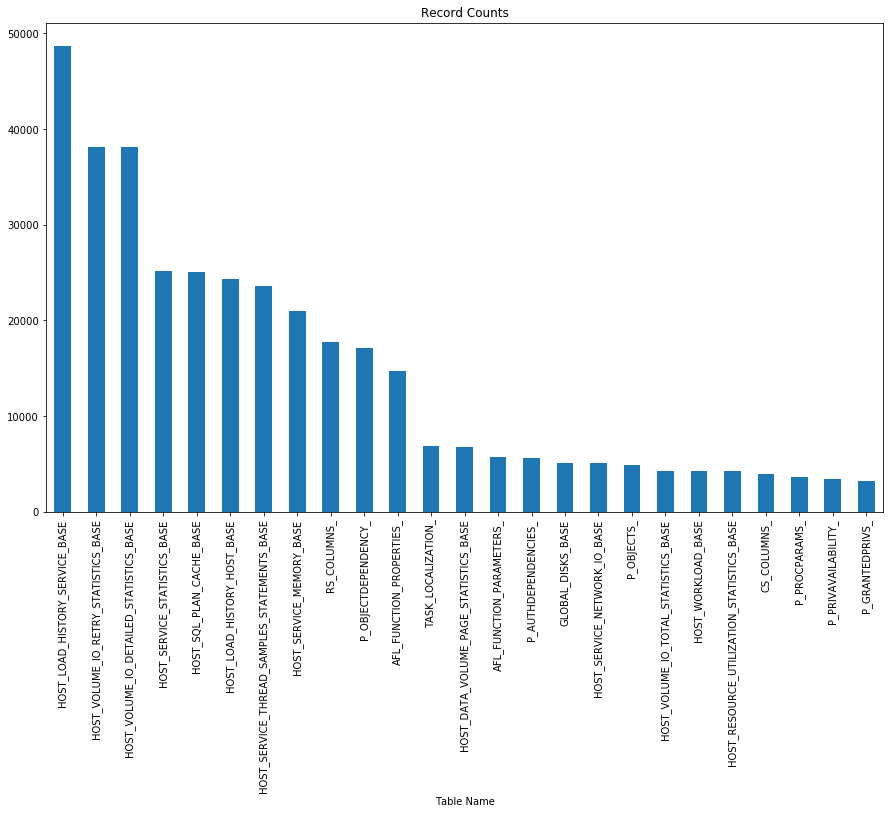

In [14]:
measure = 'RECORD_COUNT'
tables.groupby(['TABLE_NAME']) \
    .sum() \
    .sort_values(by=measure,ascending=False) \
    .nlargest(25,measure)[measure] \
    .plot(kind='bar',legend=None,title="Record Counts",figsize=(15,9)) \
    .set_xlabel('Table Name')